<a href="https://colab.research.google.com/github/DhanvinS/Deep-Learning/blob/main/Neural%20Networks/%20Neural_network_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 a

In [ ]:
import numpy as np

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [ ]:
def train_network(x, y, lr=0.05, iterations=50):
    # initialize weights ~ Uniform(0,1)
    Theta1 = np.random.uniform(0, 1, (2, 2))  # input -> hidden
    Theta2 = np.random.uniform(0, 1, (1, 2))  # hidden -> output

    losses = []

    for _ in range(iterations):
        # forward pass
        z2 = Theta1 @ x
        a2 = sigmoid(z2)
        z3 = Theta2 @ a2
        y_hat = z3.item()

        # squared error loss
        loss = (y_hat - y) ** 2
        losses.append(loss)

        # backpropagation
        dL_dz3 = 2 * (y_hat - y)
        dTheta2 = dL_dz3 * a2.T

        dL_dz2 = dL_dz3 * Theta2.T * sigmoid_derivative(z2)
        dTheta1 = dL_dz2 @ x.T

        # update weights
        Theta2 -= lr * dTheta2
        Theta1 -= lr * dTheta1

    return losses

1 b

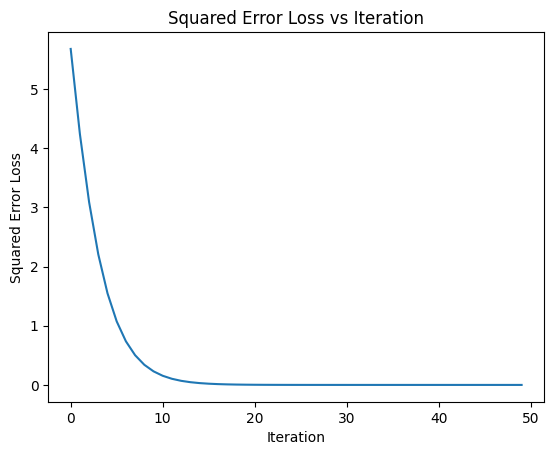

In [ ]:
import matplotlib.pyplot as plt

x = np.array([[2.0], [1.0]])
y = 3.0

losses = train_network(x, y, lr=0.05, iterations=50)

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Squared Error Loss")
plt.title("Squared Error Loss vs Iteration")
plt.show()

2 a

In [ ]:
from google.colab import files
files = files.upload()

Saving moonDataset.csv to moonDataset.csv


In [7]:
import pandas as pd

df = pd.read_csv('moonDataset.csv')
df.head()

,X1,X2,X3,label
0,-0.926767,-0.111073,0.086017,0
1,-0.917583,0.706006,0.058041,0
2,0.437984,0.899093,0.072543,0
3,0.089694,0.291446,0.070444,1
4,0.110672,-0.070806,-0.090376,1


In [10]:
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 150,
    test_size = 50,
    shuffle = True,
    random_state = 42
)

In [15]:
from sklearn.utils import resample

bootstrapped_sets = []
for _ in range(20):
    X_b, y_b = resample(X_train, y_train,
                        n_samples=150,
                        replace=True)
    bootstrapped_sets.append((X_b, y_b))


2 b

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import zero_one_loss

models = []
error_rates = []

for X_b, y_b in bootstrapped_sets:
    model = MLPClassifier(
        hidden_layer_sizes=(10,),
        activation="relu",
        solver="adam",
        max_iter=1000
    )
    model.fit(X_b, y_b)
    y_pred = model.predict(X_test)
    error_rates.append(zero_one_loss(y_test, y_pred))
    models.append(model)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

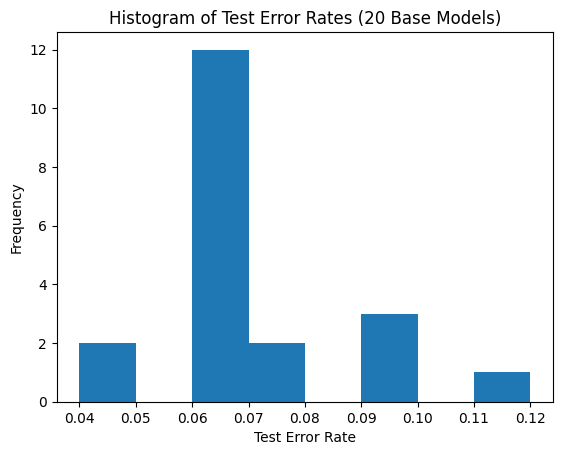

In [17]:
plt.hist(error_rates, bins=8)
plt.xlabel("Test Error Rate")
plt.ylabel("Frequency")
plt.title("Histogram of Test Error Rates (20 Base Models)")
plt.show()


2 c

In [18]:
ensemble_sizes = [5, 10, 15, 20]
ensemble_errors = []

for m in ensemble_sizes:
    preds = np.zeros((len(y_test), m))
    for i in range(m):
        preds[:, i] = models[i].predict(X_test)
    y_ensemble = (np.mean(preds, axis=1) >= 0.5).astype(int)
    ensemble_errors.append(zero_one_loss(y_test, y_ensemble))


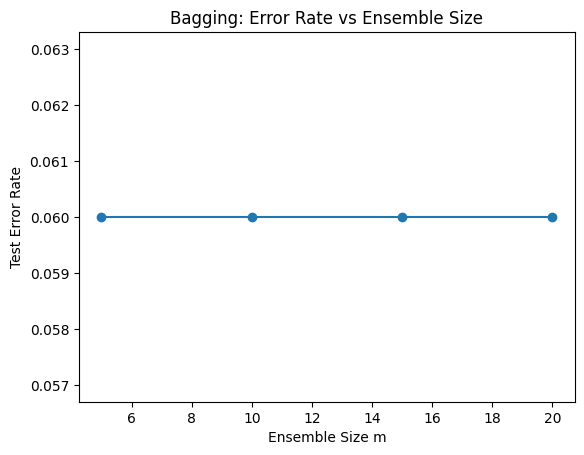

In [19]:
plt.plot(ensemble_sizes, ensemble_errors, marker='o')
plt.xlabel("Ensemble Size m")
plt.ylabel("Test Error Rate")
plt.title("Bagging: Error Rate vs Ensemble Size")
plt.show()
